# @Author Arif YILMAZ, a.yilmaz@maastrichtuniversity.nl
@repoaddress "https://github.com/arifx/XPREDICT"

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from subprocess import check_output

In [44]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
features= ['Feature_GO-SIM_HPO-SIM',
 'Feature_GO-SIM_PHENO-SIM',
 'Feature_PPI-SIM_HPO-SIM',
 'Feature_PPI-SIM_PHENO-SIM',
 'Feature_SE-SIM_HPO-SIM',
 'Feature_SE-SIM_PHENO-SIM',
 'Feature_TARGETSEQ-SIM_HPO-SIM',
 'Feature_TARGETSEQ-SIM_PHENO-SIM',
 'Feature_TC_HPO-SIM',
 'Feature_TC_PHENO-SIM']
outclass=['Class']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/XAI


In [ ]:
deepdrug_dataset_df=pd.read_csv("deepdrug_repurposingpredictiondataset.csv")
Xdf= deepdrug_dataset_df[features]
ydf=deepdrug_dataset_df[outclass]

In [ ]:
print(shap.__version__)

In [ ]:
Xdf.size

In [ ]:
import sklearn

# Logistic Regression Classifier

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


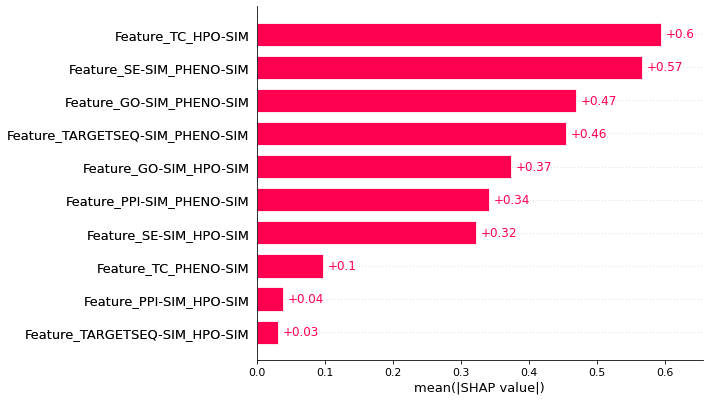

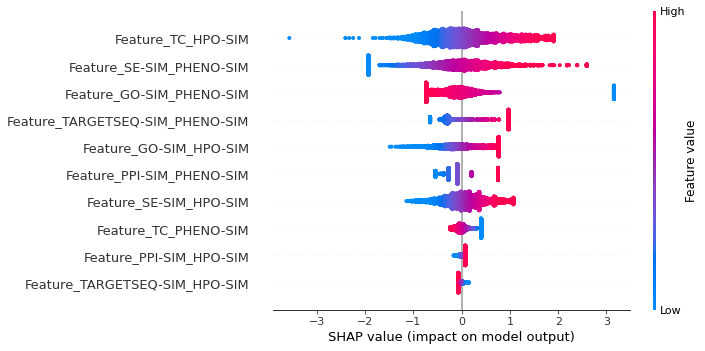

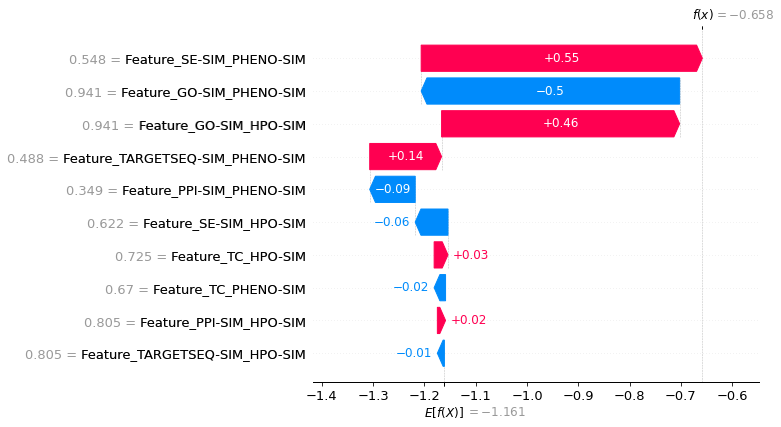

In [45]:

modellr = sklearn.linear_model.LogisticRegression()
modellr.fit(Xdf, ydf)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
X100 = shap.utils.sample(Xdf, 50130)
explainerlr = shap.Explainer(modellr,X100)
shap_valueslr = explainerlr(Xdf)


shap.plots.bar(shap_valueslr,max_display=11)
shap.plots.beeswarm(shap_valueslr)
shap_valueslr[1]
# visualize the first prediction's explanation
shap.plots.waterfall(shap_valueslr[1])


In [46]:
shap_valueslr[1]

.values =
array([ 0.46404504, -0.5038148 ,  0.01595717, -0.08868919, -0.06390235,
        0.54806565, -0.01366188,  0.14010396,  0.02699004, -0.02224975])

.base_values =
-1.1610182515444034

.data =
array([0.9410712 , 0.9410712 , 0.80540758, 0.34900108, 0.62173837,
       0.54772256, 0.80540758, 0.48797623, 0.72465372, 0.66953406])

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[0.13395532 0.07040629 0.13532479 0.02718662 0.10115818 0.09673718
 0.17473927 0.06947547 0.13720582 0.05381105]


<BarContainer object of 10 artists>

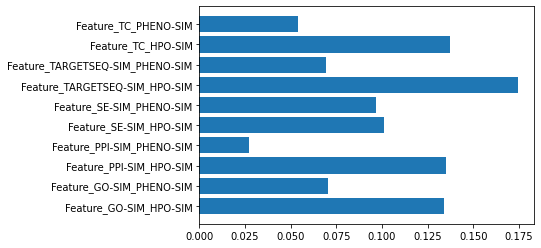

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(Xdf, ydf)

print(rf.feature_importances_)
plt.barh(Xdf.columns, rf.feature_importances_)

In [48]:
!pip install shap 
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Logistic Regression Classifier for OMIM: 104300 (Alzheimer's Disease)

@Author Arif YILMAZ, a.yilmaz@maastrichtuniversity.nl @repoaddress "https://github.com/arifx/DeepDrugRepurposing"

## Logistic Regression Classifier for OMIM: 104300 (Alzheimer's Disease)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from subprocess import check_output
import shap

In [50]:
features= ['Feature_GO-SIM_HPO-SIM',
 'Feature_GO-SIM_PHENO-SIM',
 'Feature_PPI-SIM_HPO-SIM',
 'Feature_PPI-SIM_PHENO-SIM',
 'Feature_SE-SIM_HPO-SIM',
 'Feature_SE-SIM_PHENO-SIM',
 'Feature_TARGETSEQ-SIM_HPO-SIM',
 'Feature_TARGETSEQ-SIM_PHENO-SIM',
 'Feature_TC_HPO-SIM',
 'Feature_TC_PHENO-SIM']
outclass=['Class']

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


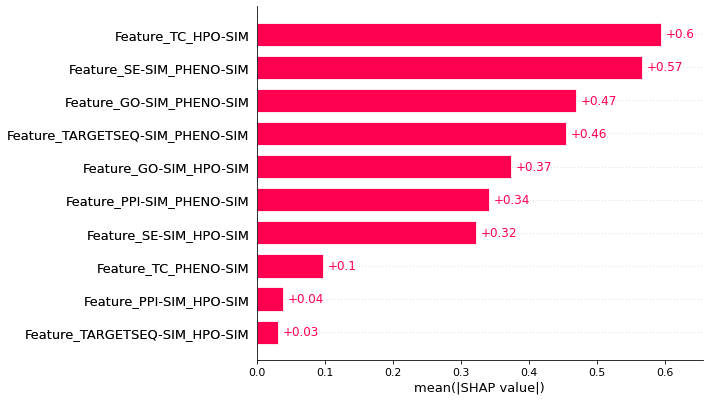

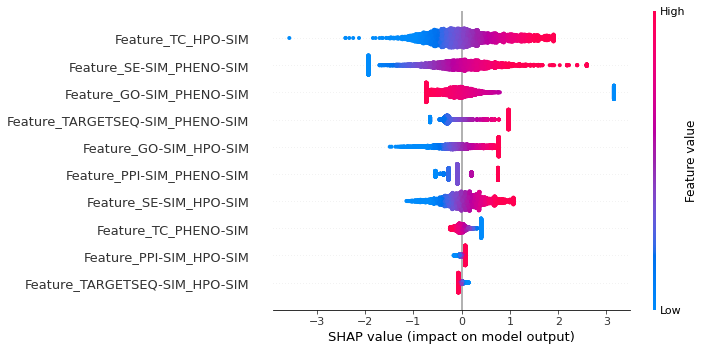

In [51]:

modellr = sklearn.linear_model.LogisticRegression()
modellr.fit(Xdf, ydf)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
X100 = shap.utils.sample(Xdf, 50130)
explainerlr = shap.Explainer(modellr,X100)
shap_valueslr = explainerlr(Xdf)


shap.plots.bar(shap_valueslr,max_display=11)
shap.plots.beeswarm(shap_valueslr)
# shap_valueslr[1]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_valueslr[1])


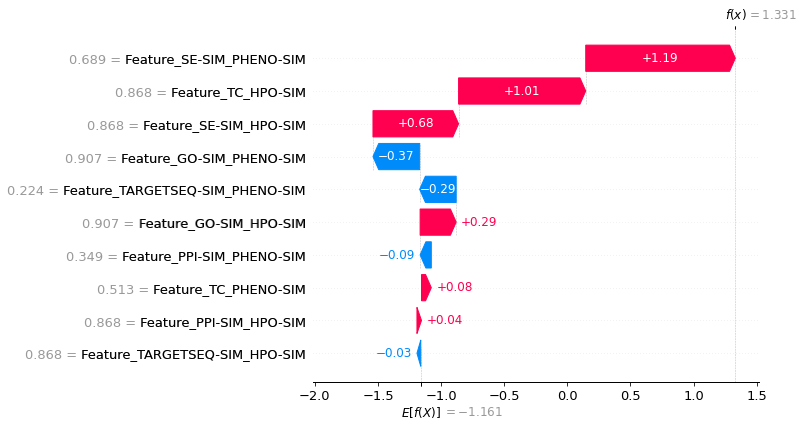

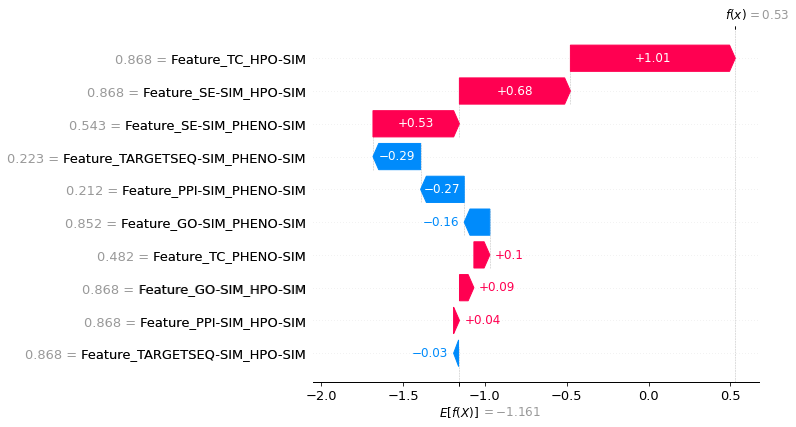

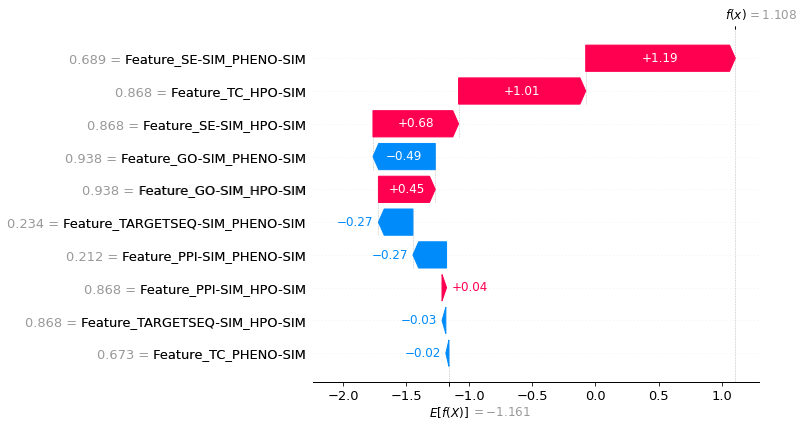

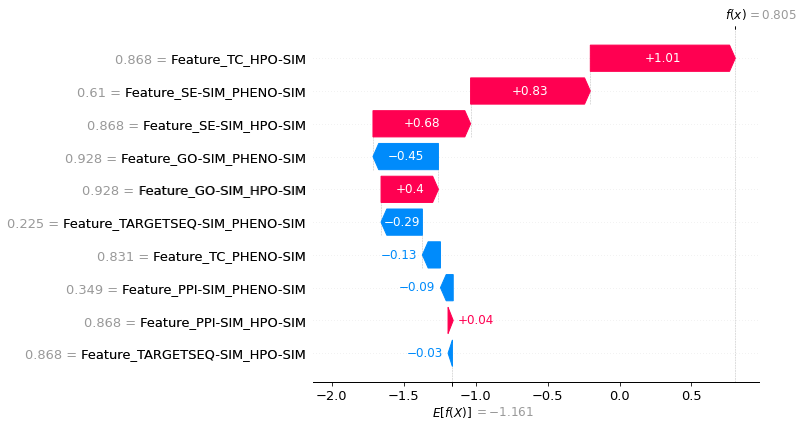

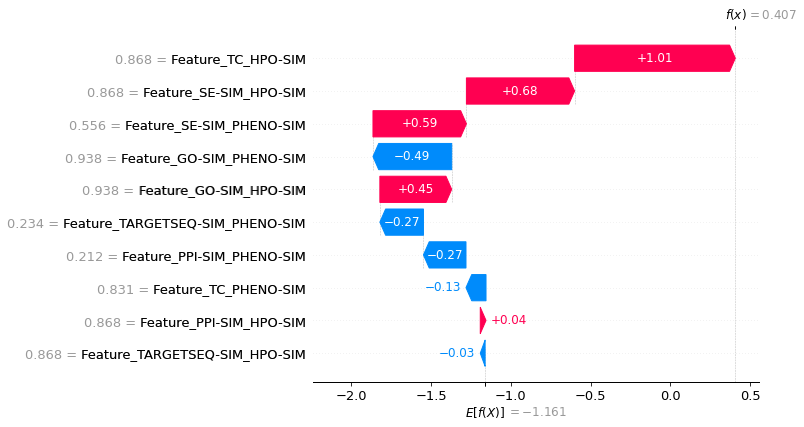

In [52]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # 
alz = [55, 534, 697, 1039, 1182]
j = 1
for i in alz:
    # plt.figure(figsize=(10,10))
    shap.plots.waterfall(shap_valueslr[i])
    j += 1
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(Xdf, ydf)
# print(rf.feature_importances_)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

In [ ]:
explainerrf = shap.TreeExplainer(rf)
shap_valuesrf = explainerrf.shap_values(Xdf)
shap.summary_plot(shap_valuesrf, Xdf, plot_type="bar")


shap.plots.bar(shap_valuesrf,max_display=11)
shap.plots.beeswarm(shap_valuesrf)
# shap_valuesrf[1]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_valuesrf[1])

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # 
alz = [55, 534, 697, 1039, 1182]
j = 1
for i in alz:
    shap.plots.waterfall(shap_valuesrf[i])
    j += 1
plt.show()

In [ ]:
shap_valuesrf

In [ ]:
shap.plots.waterfall(shap_valuesrf[55])

In [ ]:
X100 = shap.utils.sample(Xdf, 50130)

explainerrf = shap.TreeExplainer(rf,X100)

shap_valuesrf = explainerrf(Xdf)


In [ ]:
len(shap_valuesrf)

In [ ]:
# shap.plots.bar(shap_valuesrf,max_display=11)

# shap.plots.beeswarm(shap_valuesrf)

In [ ]:
shap_values = shap.TreeExplainer(rf).shap_values(Xdf)

In [ ]:
shap.summary_plot(shap_values, Xdf)

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # 
alz = [55, 534, 697, 1039, 1182]
j = 1
for i in alz:
    shap.plots.waterfall(shap_valuesrf[i])
    j += 1
plt.show()